In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
    layer.trainable = False



x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory= "C:\\Users\\admin\\Desktop\\Final Project\\Emotion-detection-main\\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices


Found 28709 images belonging to 7 classes.


{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array


# Create generator for validation (just rescaling, no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

val_data = val_datagen.flow_from_directory(
    directory=r"C:\\Users\\admin\Desktop\\Final Project\\Emotion-detection-main\\train", 
    target_size=(224,224), 
    batch_size=32,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

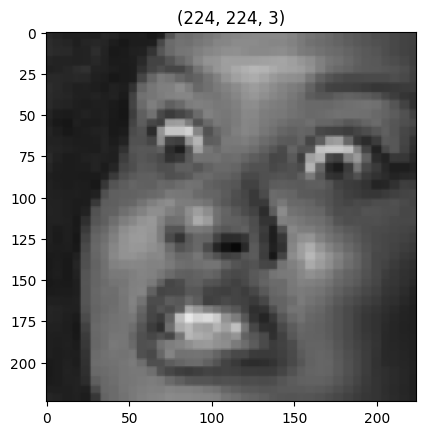

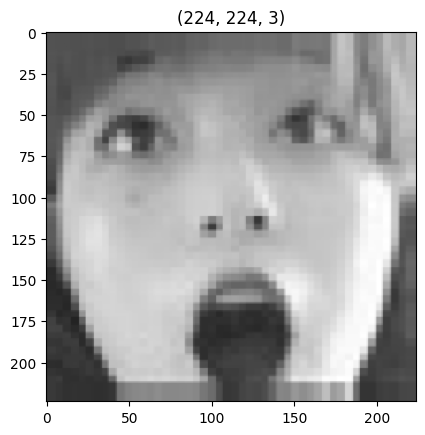

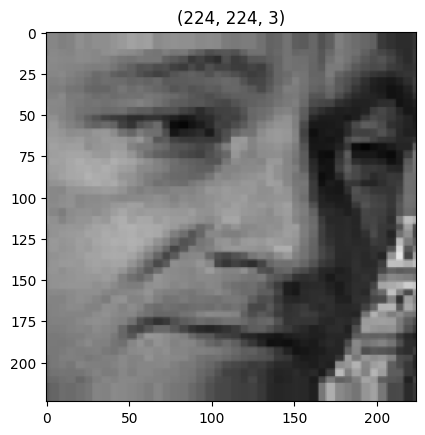

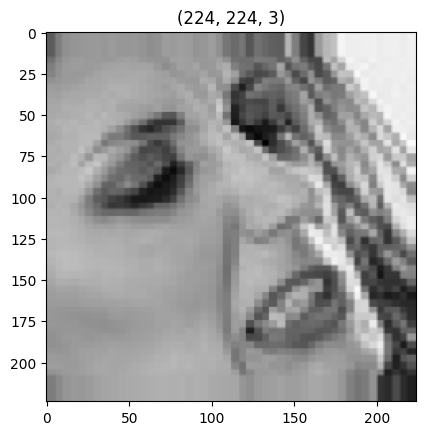

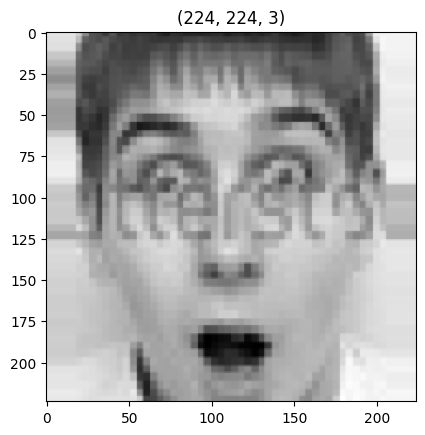

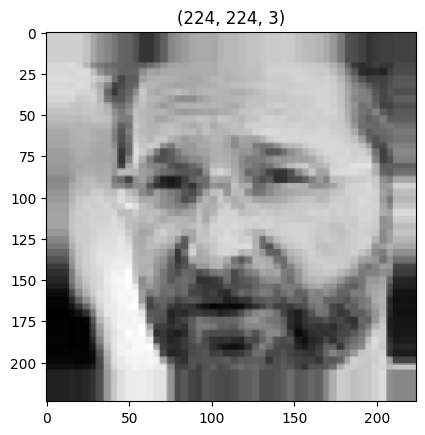

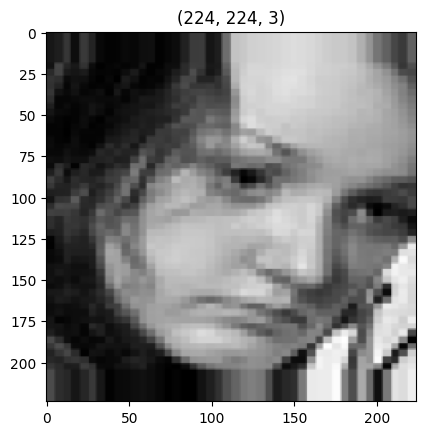

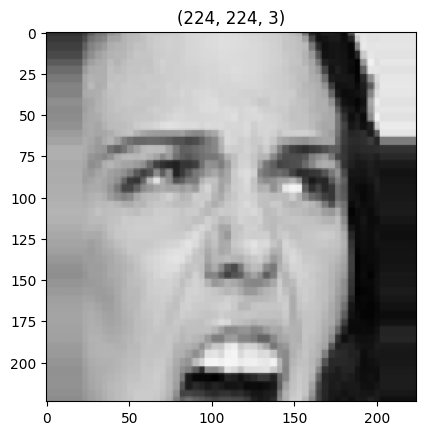

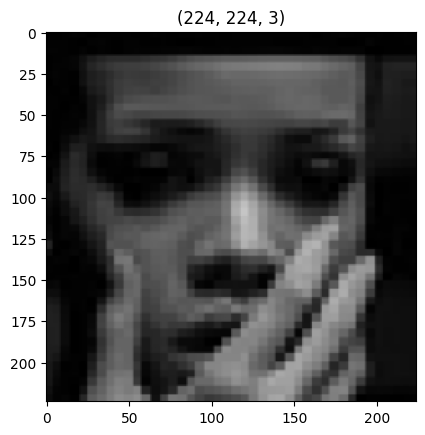

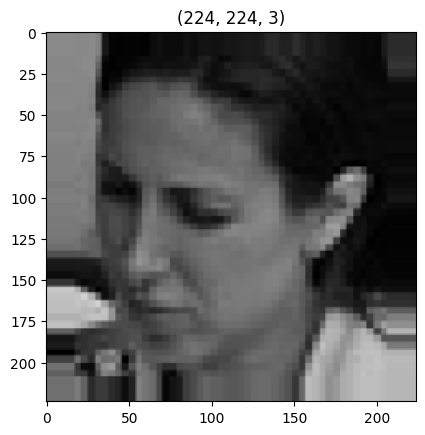

In [8]:
import matplotlib.pyplot as plt

# to visualize the images in the traing data denerator 

t_img, label = next(train_data)


#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [9]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [10]:
hist = model.fit(train_data, 
                 steps_per_epoch=10, 
                 epochs=30, 
                 validation_data=val_data, 
                 validation_steps=8, 
                 callbacks=[es, mc])


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2006 - loss: 13.1934
Epoch 1: val_accuracy improved from None to 0.29688, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.2125 - loss: 16.5476 - val_accuracy: 0.2969 - val_loss: 8.6898
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3192 - loss: 10.1795
Epoch 2: val_accuracy improved from 0.29688 to 0.42969, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2875 - loss: 11.0444 - val_accuracy: 0.4297 - val_loss: 5.0225
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3570 - loss: 7.5160
Epoch 3: val_accuracy did not improve from 0.42969
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3625 - loss: 7.1878 - val_accuracy: 0.3203 - val_loss: 6.8737
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2975 - loss: 7.9764
Epoch 4: val_accuracy did not improve from 0.42969
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3219 - loss: 7.2046 - val_accuracy: 0.3633 - val_loss: 5.9749
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3638 - loss: 6.6469
Epoch 5: val_accuracy did not improve from 0.42969
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.3969 - loss: 6.5120 - val_accuracy: 0.3828 - val_loss: 6.9763
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3521 - loss: 7.3193
Epoch 6: val_accuracy did not improve from 0.42969
10/

In [11]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("C:\\Users\\admin\Desktop\\Final Project\\Emotion-detection-main\\best_model.h5")

In [12]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [1]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

NameError: name 'plt' is not defined

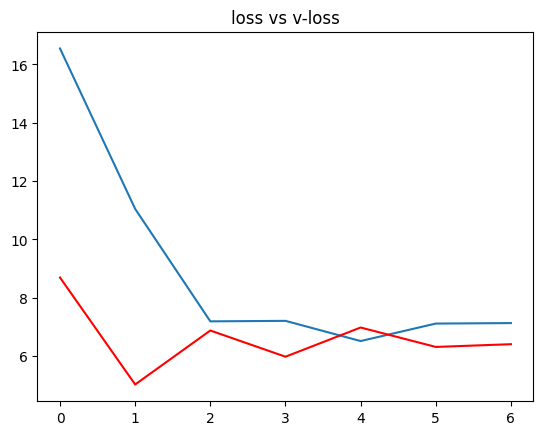

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [15]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
 the image is of Sad


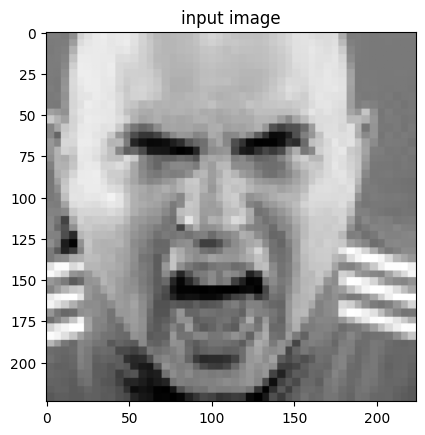

In [16]:
import numpy as np
# path for the image to see if it predics correct class

path = r"C:\\Users\\admin\\Desktop\\Final Project\\Emotion-detection-main\\train\Angry\\3.jpg"

img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()